TOTO予測
===

# データ収集

[公式記録](https://data.j-league.or.jp/)からデータを収集する。

APIとかで取得できるようにはなっていないので、HTMLをパースして加工しやすいような形式にすることを考える。

`https://data.j-league.or.jp/SFMS01/search?competition_years=<年度>&competition_frame_ids=<カテゴリ>`

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
year = 2018
competition = 2
url = 'https://data.j-league.or.jp/SFMS01/search?competition_years='+ str(year) + '&competition_frame_ids=' + str(competition)

print("URL= " + url)
resp = requests.get(url)
#print(resp.text)

HTMLを直接見ると、tableタグのデータを見れば良さそう。

Tableタグの取得は、pandasで簡単に取れるらしい([参考](https://qiita.com/kitsuyui/items/4906bb457af4d0e2d0a5))ので、これを使う。

In [ ]:
import pandas as pd
from IPython.core.display import display
dfs = pd.io.html.read_html(url)
dfs[0] = dfs[0].drop(['インターネット中継・TV放送','入場者数'],axis=1) # 結果に関係なさそうな放送局と入場者数はこの時点で削除しておく
display(dfs[0])

ここまでで、[download.py](download.py)の関数download_resultを作成したので、これで試してみる。

In [ ]:
import download
df = download.download_result(year=1992)
display(df)

CSVとかでいいけど、最近データベースを勉強中なのでsqlite3に保存してみる  
pandasのDataFrameはto_sqlメソッドでSQLに変換可能らしい([参考](http://www.stockdog.work/entry/2017/03/22/010057))。

保存場所として、data/jleague.dbとするものとした。  
この場合、dataフォルダが存在しない場合は作ることにする。

In [ ]:
import sqlite3
import os
db_name = "data/test.db"
if os.path.exists('data') == False:
    os.mkdir('data')
conn = sqlite3.connect(db_name) # DB接続
dfs[0].to_sql("result", conn, if_exists='replace') # DFをDBに変換

ここまでで、download_all_resultsにした。

download_all_resultsは、1992年～2017年のデータを取得し、sqlite(data/jleague.db)に変換する。  
jleague.dbのresultというデータベースに、取得した結果を格納する。

In [ ]:
download.download_all_results()

生成されたDBを見てみる。

In [1]:
import sqlite3
import pandas as pd
db_name = 'data/jleague.db'
conn = sqlite3.connect(db_name)
df = pd.read_sql("select * from result", conn)
conn.close()

#display(df)

In [2]:
# 不要データを削除
df = df.drop("index",axis=1)
df = df.drop("インターネット中継・TV放送",axis=1)
df = df.drop("入場者数",axis=1)
display(df)

,年度,大会,節,試合日,K/O時刻,ホーム,スコア,アウェイ,スタジアム
0,1992,ＹＮＣ,第１節第１日,09/05(土),15:00,鹿島,4-2,横浜Ｆ,笠松
1,1992,ＹＮＣ,第１節第１日,09/05(土),15:30,名古屋,3-0,清水,瑞穂球
2,1992,ＹＮＣ,第１節第１日,09/05(土),18:02,浦和,2-3,市原,大宮
3,1992,ＹＮＣ,第１節第１日,09/05(土),19:00,Ｇ大阪,2-0,横浜M,神戸中央
4,1992,ＹＮＣ,第１節第２日,09/06(日),19:00,広島,2-3,Ｖ川崎,広島ス
5,1992,ＹＮＣ,第２節第１日,09/09(水),18:30,広島,2-3,浦和,広島ス
6,1992,ＹＮＣ,第２節第１日,09/09(水),19:00,鹿島,4-3,Ｖ川崎,国立
7,1992,ＹＮＣ,第２節第１日,09/09(水),19:00,清水,2-1,横浜M,日本平
8,1992,ＹＮＣ,第２節第１日,09/09(水),19:00,名古屋,2-1,横浜Ｆ,瑞穂球
9,1992,ＹＮＣ,第２節第１日,09/09(水),19:00,Ｇ大阪,1-0,市原,神戸中央


# 符号化

* チーム名・スタジアム名を符号化
* 勝ち・負け・引き分けを符号化
* 試合日を月のみ取得

In [3]:
home = pd.concat([df["ホーム"],df["アウェイ"]]).drop_duplicates().reset_index(drop=True).to_dict()
team_dict = {v:k for k, v in home.items()} # 辞書のキー・バリュー交換

* チームの吸収合併(横浜Ｆ・横浜M→横浜FM)
* ホームタウン変更(市原→千葉、V川崎→東京V)
* チーム名変更(F東京→FC東京)

を同じ数値として扱う

In [4]:
team_dict["横浜FM"] = team_dict["横浜M"]
team_dict["千葉"] = team_dict["市原"]
team_dict["FC東京"] = team_dict["Ｆ東京"]
team_dict["Ｖ川崎"] = team_dict["東京Ｖ"]

In [5]:
tmp = [team_dict[df["ホーム"][i]] for i in range(len(df))]
df["home"] = tmp
tmp = [team_dict[df["アウェイ"][i]] for i in range(len(df))]
df["away"] = tmp
display(df)

,年度,大会,節,試合日,K/O時刻,ホーム,スコア,アウェイ,スタジアム,home,away
0,1992,ＹＮＣ,第１節第１日,09/05(土),15:00,鹿島,4-2,横浜Ｆ,笠松,0,6
1,1992,ＹＮＣ,第１節第１日,09/05(土),15:30,名古屋,3-0,清水,瑞穂球,1,5
2,1992,ＹＮＣ,第１節第１日,09/05(土),18:02,浦和,2-3,市原,大宮,2,9
3,1992,ＹＮＣ,第１節第１日,09/05(土),19:00,Ｇ大阪,2-0,横浜M,神戸中央,3,7
4,1992,ＹＮＣ,第１節第２日,09/06(日),19:00,広島,2-3,Ｖ川崎,広島ス,4,37
5,1992,ＹＮＣ,第２節第１日,09/09(水),18:30,広島,2-3,浦和,広島ス,4,2
6,1992,ＹＮＣ,第２節第１日,09/09(水),19:00,鹿島,4-3,Ｖ川崎,国立,0,37
7,1992,ＹＮＣ,第２節第１日,09/09(水),19:00,清水,2-1,横浜M,日本平,5,7
8,1992,ＹＮＣ,第２節第１日,09/09(水),19:00,名古屋,2-1,横浜Ｆ,瑞穂球,1,6
9,1992,ＹＮＣ,第２節第１日,09/09(水),19:00,Ｇ大阪,1-0,市原,神戸中央,3,9


勝敗はホームチームの勝ち(WIN)、負け(LOSE)、引き分け(DRAW)の三種類に符号化する。  
最終出力を獲得勝ち点で出力することを考え、WIN=3/DRAW=1/LOSE=0としておく。

カップ戦とかでPK戦の結果も含まれているが、PKは引き分けととらえることにする。

In [6]:
import re
import numpy as np
wdl = []
# win-draw-lose VゴールとかPKとかはTOTO予想に関係ないので無視
LOSE = 0
DRAW = 1
WIN = 3
OTHER = np.nan
for result in df["スコア"]:
    tmp = re.split("[-()]",result)
    if len(tmp) < 2: # X-Xという形式でないものはスルー
        wdl.append(OTHER)
        continue
    if int(tmp[0]) > int(tmp[1]):
        wdl.append(WIN)
    elif int(tmp[0]) < int(tmp[1]):
        wdl.append(LOSE)
    else:
        wdl.append(DRAW)
df["result"] = wdl
#display(df)

対戦した時期として、月の情報を入れるものとする。

試合日から情報を検出する。

In [7]:
month = []
for match_day in df["試合日"]:
    tmp = match_day.split("/")[0]
    if tmp.isdigit() == True:
        month.append(int(tmp))
    else:
        month.append(np.nan)
df["month"] = month
#display(month)

In [8]:
df = df.rename(columns={"年度":"year"})
#display(df)

使うデータを1992年~2016年に絞る。  
2017年のデータは予測の正確性検証のために別にしておくため

In [9]:
data = df[df["year"] < 2017]

結果の異常値を弾く。

異常値としてNaN(np.nan)を使ったので、NaNを含む列をドロップする。

In [10]:
data = data.dropna()

ホームチームを限定して、入力データと2017年のデータを使った正解データを生成してみる。

In [11]:
def generate_trainng_data(team, year=2017):
    """
    ホームチームを指定し、学習用データ(指定した年度より前のデータから)を生成
    """
    data = df[df["year"] < year].dropna()
    x = data[data["home"] == team_dict[team]][["away","year","month"]]
    y = data[data["home"] == team_dict[team]][["result"]]
    return x, y

def generate_correct_data(team, year=2017):
    """
    ホームチームを指定し、モデルの確からしさを検証するためのデータを生成
    """
    data = df[df["year"] == year].dropna()
    x = data[data["home"] == team_dict[team]][["away","year","month"]]
    y = data[data["home"] == team_dict[team]][["result"]]
    return x, y

# 人工知能に入れてみる

とりあえず(うまくいくとは思えないが)ここまで加工したデータで、
* home
* away
* year
* month

を入力、resultを出力とするニューラルネットを構築してみたい。

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_history(history):
    # 精度の履歴をプロット
    fig = plt.figure(figsize=(15,5))
    plt.plot(history.history["acc"])
    plt.grid()
    plt.title("model accuracy")
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend(["acc"])
    plt.show()
    # 損失の履歴をプロット
    fig = plt.figure(figsize=(15,5))
    plt.plot(history.history["loss"])
    plt.grid()
    plt.title("model loss")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend(["loss"])
    plt.show()

Epoch 1/1000
590/590 [==============================] - 0s 272us/step - loss: 0.4847 - acc: 0.1966
Epoch 2/1000
590/590 [==============================] - 0s 10us/step - loss: -5.0540e-07 - acc: 0.3763
Epoch 3/1000
590/590 [==============================] - 0s 10us/step - loss: -5.0540e-07 - acc: 0.0000e+00
Epoch 4/1000
590/590 [==============================] - 0s 10us/step - loss: -5.0540e-07 - acc: 0.0000e+00
Epoch 5/1000
590/590 [==============================] - 0s 10us/step - loss: -5.0540e-07 - acc: 0.0000e+00
Epoch 6/1000
590/590 [==============================] - 0s 8us/step - loss: -5.0540e-07 - acc: 0.0000e+00
Epoch 7/1000
590/590 [==============================] - 0s 10us/step - loss: -5.0540e-07 - acc: 0.0000e+00
Epoch 8/1000
590/590 [==============================] - 0s 8us/step - loss: -5.0540e-07 - acc: 0.0000e+00
Epoch 9/1000
590/590 [==============================] - 0s 10us/step - loss: -5.0540e-07 - acc: 0.0000e+00
Epoch 10/1000
590/590 [============================

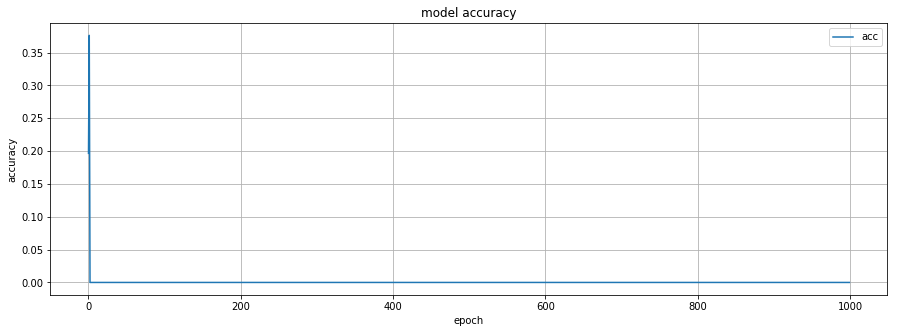

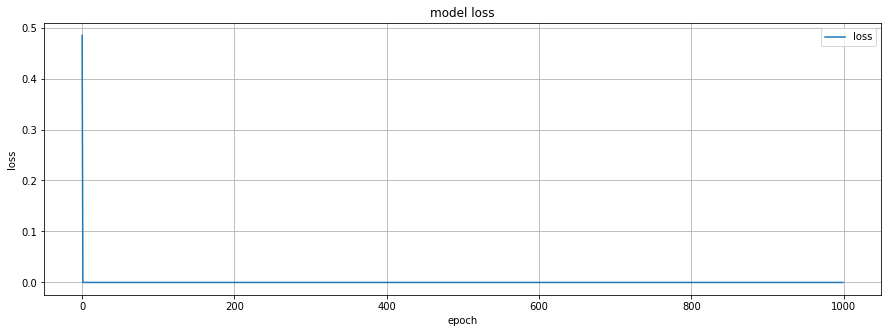

In [21]:
import numpy as np
import tensorflow as tf
#import tensorboard as tb

# 入力Xと出力yを定義
X, y = generate_trainng_data("浦和",2017)

#
# ニューラルネットワークの定義
#
model = tf.keras.models.Sequential()	# Sequentialモデル
# 入力2/出力8/活性化関数tanhの層を追加
model.add(tf.keras.layers.Dense(1024,input_dim=3, activation='tanh'))
# 入力8(省略)/出力1/活性化関数sigmoidの層を追加
model.add(tf.keras.layers.Dense(1, activation='softplus'))
# 学習の仕方を定義
# * 目的関数(ロス関数)としてbinary_crossentropy(logloss)
# * 最適化アルゴリズムにSGD(確率的勾配降下法）、学習率を0.1に設定
# * 評価メトリクスとしてaccuracyを表示
model.compile("adamax", loss='kld',metrics=['accuracy'])

# Tensorboard用コールバック
#tb_cb = tf.keras.callbacks.TensorBoard(log_dir='./log')
#cbks = [tb_cb]
# 学習開始
# * バッチサイズ4
# * エポック数1000回
#history = model.fit(X, y, batch_size=len(X), epochs=1000, callbacks=cbks)
history = model.fit(X, y, batch_size=len(X), epochs=1000)

plot_history(history)
#tb.show_graph(tf.get_default_graph().as_graph_def()) # JupyterでTensorboardのGraphを表示させる

In [22]:
# モデルから2017年の対戦データを予想し、predict列に表示
cx, cy = generate_correct_data("浦和",2017)

predict = pd.DataFrame(model.predict(cx)) # model.predictで予想
display(pd.concat([
    cx.reset_index(drop=True), 
    cy.reset_index(drop=True), 
    predict],
    axis=1).rename(columns={0:"predict"}))

,away,year,month,result,predict
0,14,2017,3.0,3.0,8.411677
1,28,2017,3.0,3.0,8.388931
2,31,2017,4.0,3.0,8.367747
3,23,2017,4.0,3.0,8.399895
4,0,2017,5.0,0.0,8.402927
5,5,2017,5.0,1.0,8.407834
6,12,2017,6.0,0.0,8.408249
7,4,2017,7.0,3.0,8.406512
8,32,2017,7.0,3.0,8.338342
9,33,2017,8.0,1.0,8.322571


ある程度予想通りではあるが、こんな簡単には収束しない…。